In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
138,28,59000,0
214,47,43000,0
395,46,41000,1
210,48,96000,1
81,39,42000,0


# Train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scaler

### Fit is Calculate mean and standard deviation of the data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit is scaler for traning set, it will learn parameter
scaler.fit(X_train)

# Tranforming Train and Test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

## Converting Numpy array value into the dataframe

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [12]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [13]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [14]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [23]:
np.round(X_train.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [26]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

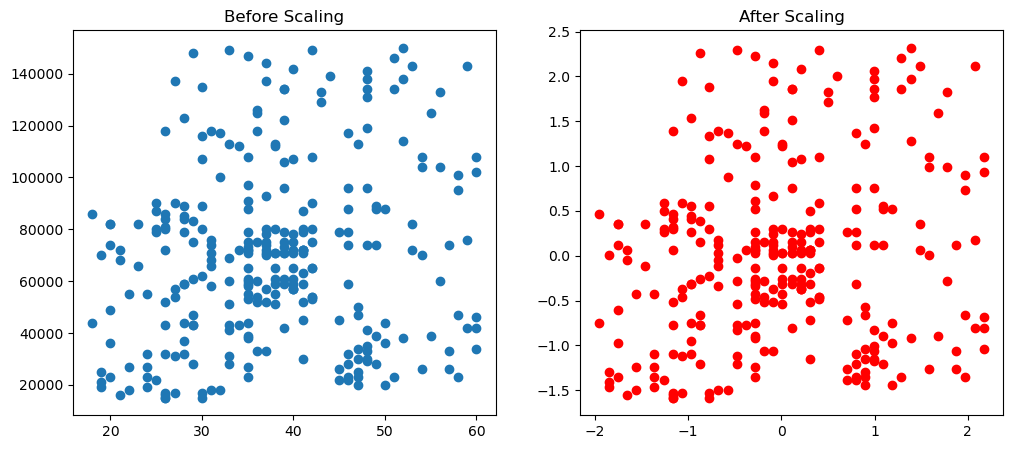

In [29]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1. scatter(X_train['Age'], X_train['EstimatedSalary' ])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red' )
ax2.set_title("After Scaling")
plt.show()

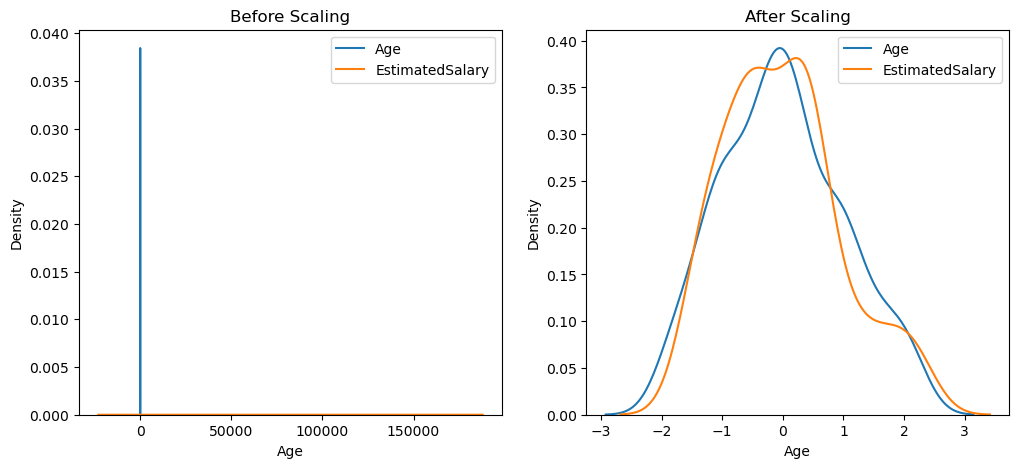

In [52]:
fig , axes = plt.subplots(ncols = 2, figsize = (12,5))

axes[0].set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=axes[0],label = "Age")
sns.kdeplot(X_test['EstimatedSalary'],ax=axes[0], label = "EstimatedSalary")
axes[0].legend()

axes[1].set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=axes[1], label = "Age")
sns.kdeplot(X_test_scaled['EstimatedSalary'],ax=axes[1], label = "EstimatedSalary")
axes[1].legend()

## Why Scaling is important

In [54]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [59]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

### Prediction

In [60]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

### Accuracy Score

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
print("Actual", accuracy_score(Y_test, y_pred))
print("Scaled", accuracy_score(Y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [63]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
